In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74"
     alt="HCA Logo" height="150" width="150"
     style="float: left; margin-right: 10px;">

|Name  | Value |
| :- |:-------------: |
| **Notebook:**  | **HotChili Trader Tear Sheet** |
| **Version:**  | 1.0.1c |
| **Date:**  | 2020-08-06  |
| **Copyright:**  | @2019-2020 |
| **Company:**  | **HotChili Analytics, LLC** |
| **Author   :**  | Alan Coppola|(ajjcoppola@hotchilianalytics.com) |
| **Author   :**  | Jeff Coppola|(jeff@hotchilianalytics.com) |

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
### %pylab inline
###figsize(12, 12)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
pd.set_option("max_colwidth", 400)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
import os

hca_root_path = os.environ['HCA_ROOT']
print(f"hca_root_path = {hca_root_path}")

# Parameters for location of zipline-broker run
nb_dir = hca_root_path + "/hca-resources/HCA_AllWeatherOptimizeVolatility/" 
ans_pkl = "HCA_AllWeatherOptimizeVolatility.pkl"
ans_data_file = nb_dir + ans_pkl

# Read in backtest results for analysis
perf=pd.read_pickle(ans_data_file)

hca_root_path = /home/hca-ws2004/hca


In [5]:
perf.columns
#dir(perf)

Index(['SPY', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

In [6]:
perf.shape

(823, 38)

In [7]:
import pandas as pd
returns, positions, transactions= pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [8]:
#positions

,Equity(2232 [IEF]),Equity(4162 [SPY]),cash
index,,,
2018-01-03 00:00:00+00:00,"5,660,285.31","3,366,732.69","968,398.41"
2018-01-04 00:00:00+00:00,"5,657,612.46","3,380,925.60","968,398.41"
2018-01-05 00:00:00+00:00,"5,650,617.58","3,403,457.18","968,398.41"
2018-01-08 00:00:00+00:00,"5,647,944.74","3,409,668.22","968,398.41"
2018-01-09 00:00:00+00:00,"5,621,045.70","3,417,399.00","968,398.41"
2018-01-10 00:00:00+00:00,"5,619,453.37","3,412,165.86","968,398.41"
2018-01-11 00:00:00+00:00,"5,623,206.72","3,437,049.71","968,398.41"
2018-01-12 00:00:00+00:00,"5,619,453.37","3,459,462.35","968,398.41"
2018-01-16 00:00:00+00:00,"5,622,126.21","3,447,621.71","968,398.41"


In [9]:
transactions

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2018-01-03 21:00:00+00:00,13215,None,2018-01-03 21:00:00+00:00,c19ae0d5bb13428181ed74f88ddbb1ed,254.89,Equity(4162 [SPY]),Equity(4162 [SPY]),"-3,368,416.06"
2018-01-03 21:00:00+00:00,56869,None,2018-01-03 21:00:00+00:00,d6c3168219ae4670883fc3629d2427d8,99.58,Equity(2232 [IEF]),Equity(2232 [IEF]),"-5,663,115.45"
2018-02-02 21:00:00+00:00,-1804,None,2018-02-02 21:00:00+00:00,99ae06bc83e64f27bdbb55de5097d074,259.33,Equity(4162 [SPY]),Equity(4162 [SPY]),"467,826.40"
2018-02-02 21:00:00+00:00,4644,None,2018-02-02 21:00:00+00:00,8c7f3ddaa1464946b094527b1a1191ab,96.80,Equity(2232 [IEF]),Equity(2232 [IEF]),"-449,536.30"
2018-03-02 21:00:00+00:00,-4167,None,2018-03-02 21:00:00+00:00,e5da520d0e784a59824e63aca8367527,253.33,Equity(4162 [SPY]),Equity(4162 [SPY]),"1,055,627.24"
2018-03-02 21:00:00+00:00,12349,None,2018-03-02 21:00:00+00:00,4d05125eed9445f996b414a8d5856f78,96.81,Equity(2232 [IEF]),Equity(2232 [IEF]),"-1,195,474.33"
2018-04-03 20:00:00+00:00,-667,None,2018-04-03 20:00:00+00:00,ea43c4f6aeba4fa081db87a206eb3efc,246.49,Equity(4162 [SPY]),Equity(4162 [SPY]),"164,407.96"
2018-04-03 20:00:00+00:00,1695,None,2018-04-03 20:00:00+00:00,8d6af48fe48546e78e95fc78c520609c,97.66,Equity(2232 [IEF]),Equity(2232 [IEF]),"-165,526.59"
2018-05-02 20:00:00+00:00,-470,None,2018-05-02 20:00:00+00:00,9cdac07d80544c04ac88411045895862,248.79,Equity(4162 [SPY]),Equity(4162 [SPY]),"116,929.21"
2018-05-02 20:00:00+00:00,1913,None,2018-05-02 20:00:00+00:00,dc72f2d02fea4c3eace634036fd6e924,96.49,Equity(2232 [IEF]),Equity(2232 [IEF]),"-184,581.96"


In [10]:
import sys

print("Tear Sheet File : {}".format(ans_data_file))
print("-----------------------------------")
print("Python version={}".format(sys.version))
print("Matplotlib version={}".format(mp.__version__))
print("Numpy version={}".format(np.version.version))


Tear Sheet File : /home/hca-ws2004/hca/hca-resources/HCA_AllWeatherOptimizeVolatility/HCA_AllWeatherOptimizeVolatility.pkl
-----------------------------------
Python version=3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
Matplotlib version=3.1.1
Numpy version=1.14.0


In [11]:
#pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

In [12]:
#returns.plot()

In [13]:
#transactions

In [14]:
#from datetime import datetime
#import pytz
#start = datetime(2017, 2, 11, 0, 0, 0, 0, pytz.utc)
#end = datetime(2019, 3, 14, 0, 0, 0, 0, pytz.utc)
#s=pd.Timestamp(start)

In [15]:
#pf.create_position_tear_sheet(returns=returns,positions=positions)
#pf.plot_perf_stats(returns= returns, factor_returns=returns)

In [16]:
sim_start=perf.index[0]
sim_end= perf.index[-1]
print("start={}  end={}".format(sim_start,sim_end))


start=2018-01-02 00:00:00+00:00  end=2021-04-09 00:00:00+00:00


Entire data start date: 2018-01-03
Entire data end date: 2021-04-09
Backtest months: 39


,Backtest
Annual return,4.8%
Cumulative returns,16.5%
Annual volatility,4.2%
Sharpe ratio,1.14
Calmar ratio,0.75
Stability,0.93
Max drawdown,-6.4%
Omega ratio,1.23
Sortino ratio,1.56
Skew,-1.01


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6.43,2020-02-20,2020-03-18,2020-05-22,67
1,3.90,2018-01-26,2018-02-08,2018-08-27,152
2,3.03,2018-08-31,2018-10-29,2019-01-30,109
3,2.93,2020-09-02,2021-03-19,NaT,NaN
4,1.47,2019-09-04,2019-09-13,2019-10-04,23


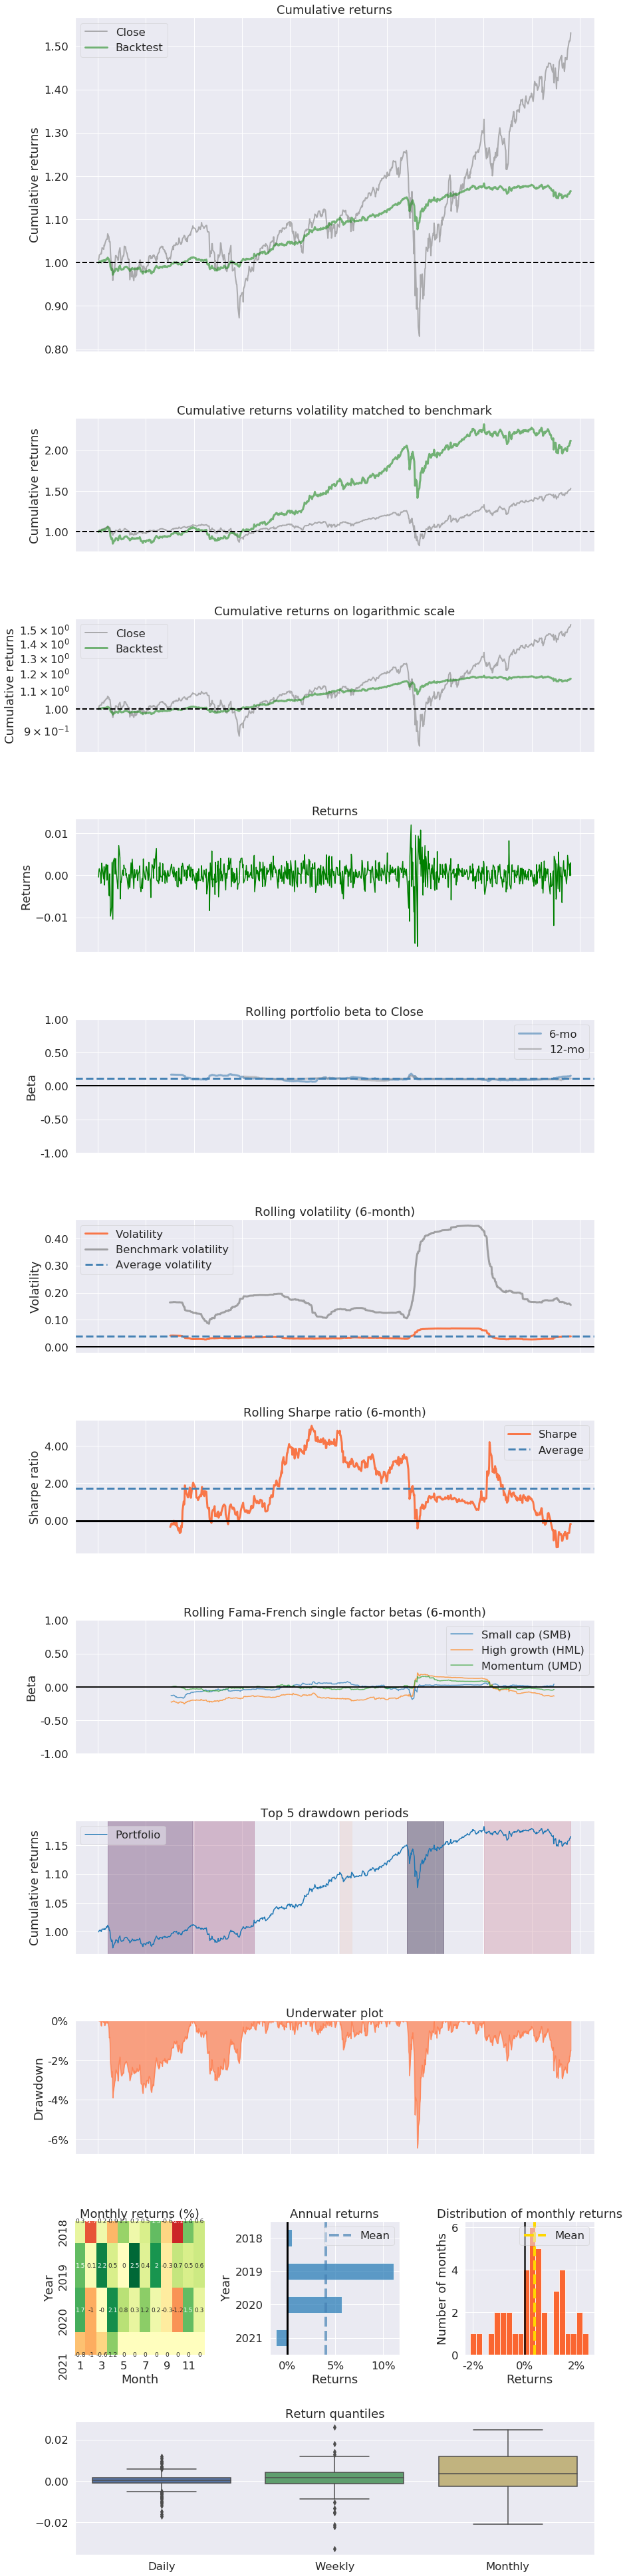

Stress Events,mean,min,max
New Normal,0.02%,-1.69%,1.19%


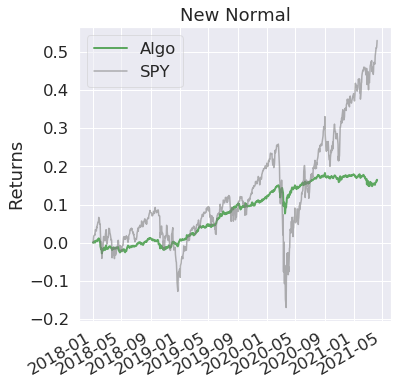

Top 10 long positions of all time,max
IEF,76.55%
SPY,35.28%


Top 10 short positions of all time,max


Top 10 positions of all time,max
IEF,76.55%
SPY,35.28%


All positions ever held,max
IEF,76.55%
SPY,35.28%


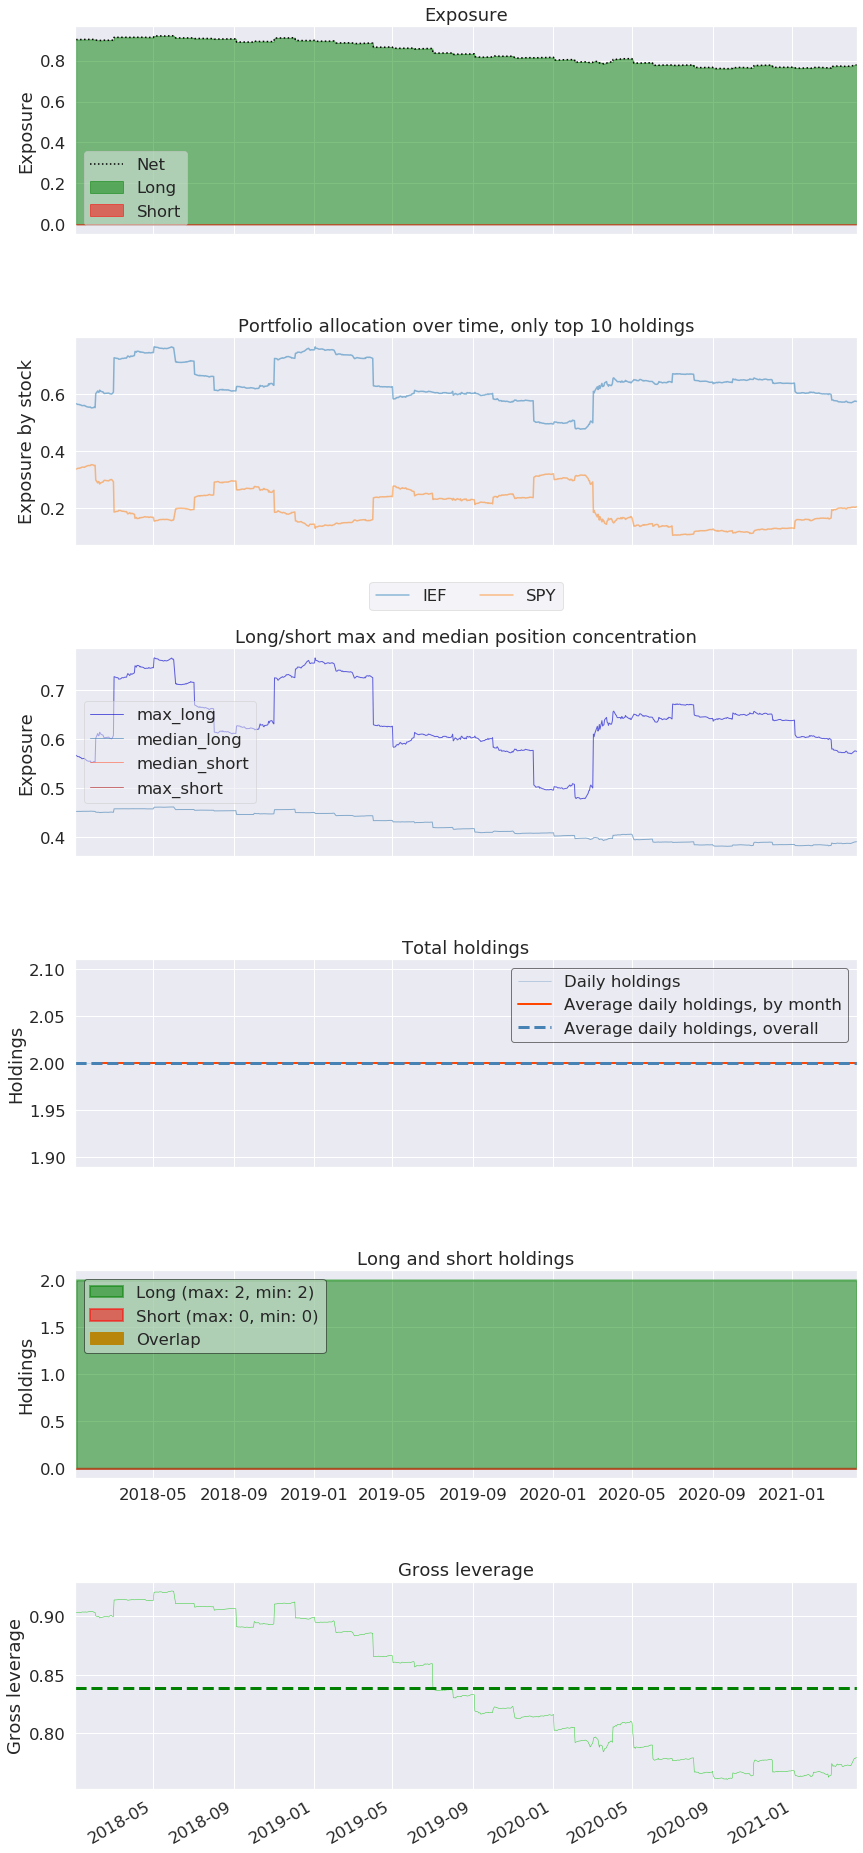

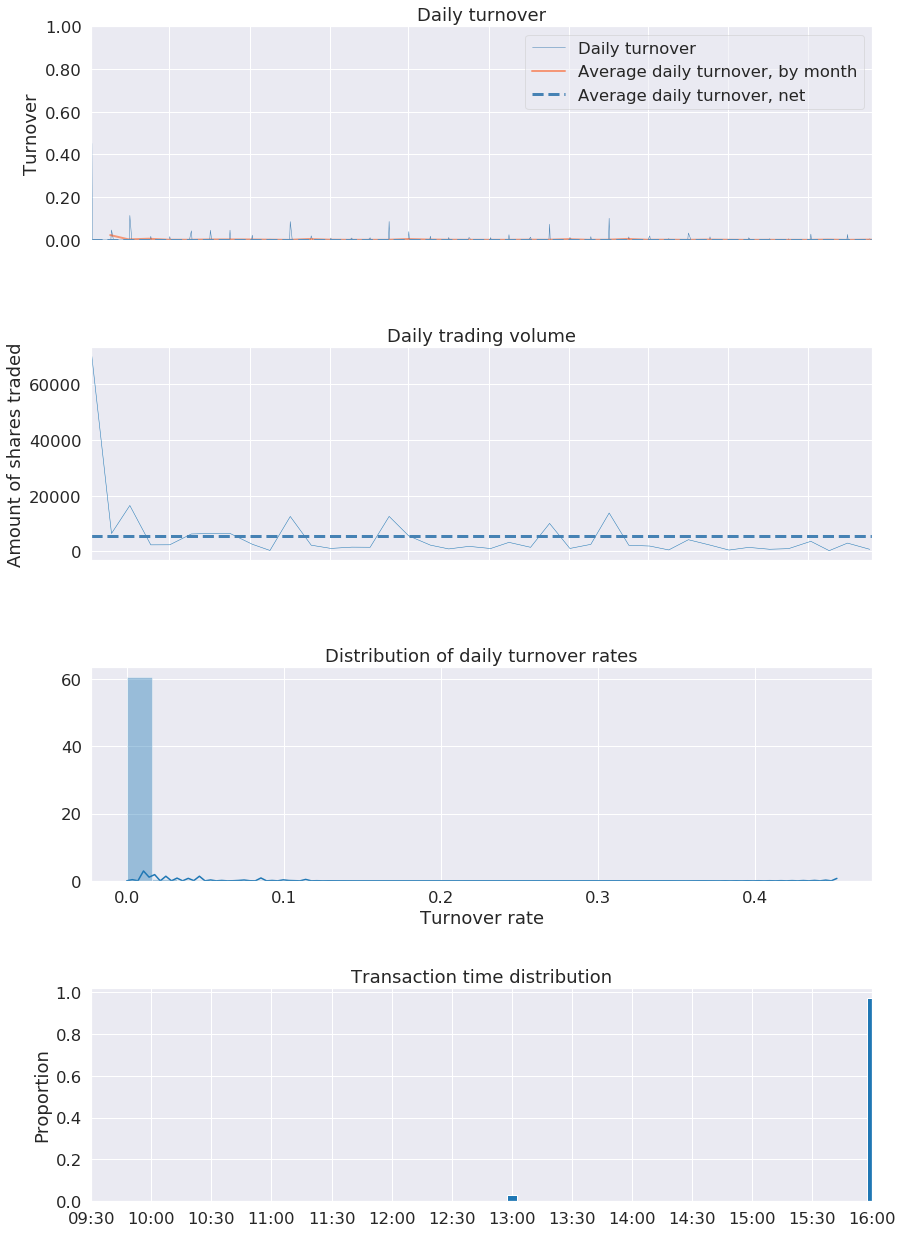

Summary stats,All trades,Long trades
Total number of round_trips,42.00,42.00
Percent profitable,0.79,0.79
Winning round_trips,33.00,33.00
Losing round_trips,9.00,9.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$1650054.98,$1650054.98
Gross profit,$1718915.54,$1718915.54
Gross loss,$-68860.57,$-68860.57
Profit factor,$24.96,$24.96
Avg. trade net profit,$39287.02,$39287.02
Avg. winning trade,$52088.35,$52088.35
Avg. losing trade,$-7651.17,$-7651.17
Ratio Avg. Win:Avg. Loss,$6.81,$6.81
Largest winning trade,$539089.16,$539089.16
Largest losing trade,$-13670.21,$-13670.21


Duration stats,All trades,Long trades
Avg duration,503 days 10:51:25.761904,503 days 10:51:25.761904
Median duration,440 days 12:00:00,440 days 12:00:00
Longest duration,1191 days 03:00:01,1191 days 03:00:01
Shortest duration,30 days 00:00:00,30 days 00:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,0.34%,0.34%
Avg returns winning,0.45%,0.45%
Avg returns losing,-0.08%,-0.08%
Median returns all round_trips,0.11%,0.11%
Median returns winning,0.16%,0.16%
Median returns losing,-0.08%,-0.08%
Largest winning trade,4.63%,4.63%
Largest losing trade,-0.14%,-0.14%


Symbol stats,IEF,SPY
Avg returns all round_trips,0.38%,0.31%
Avg returns winning,0.49%,0.42%
Avg returns losing,-0.09%,-0.07%
Median returns all round_trips,0.13%,0.09%
Median returns winning,0.20%,0.13%
Median returns losing,-0.10%,-0.07%
Largest winning trade,4.63%,4.30%
Largest losing trade,-0.14%,-0.09%


Profitability (PnL / PnL total) per name,
symbol,
IEF,52.61%
SPY,47.39%


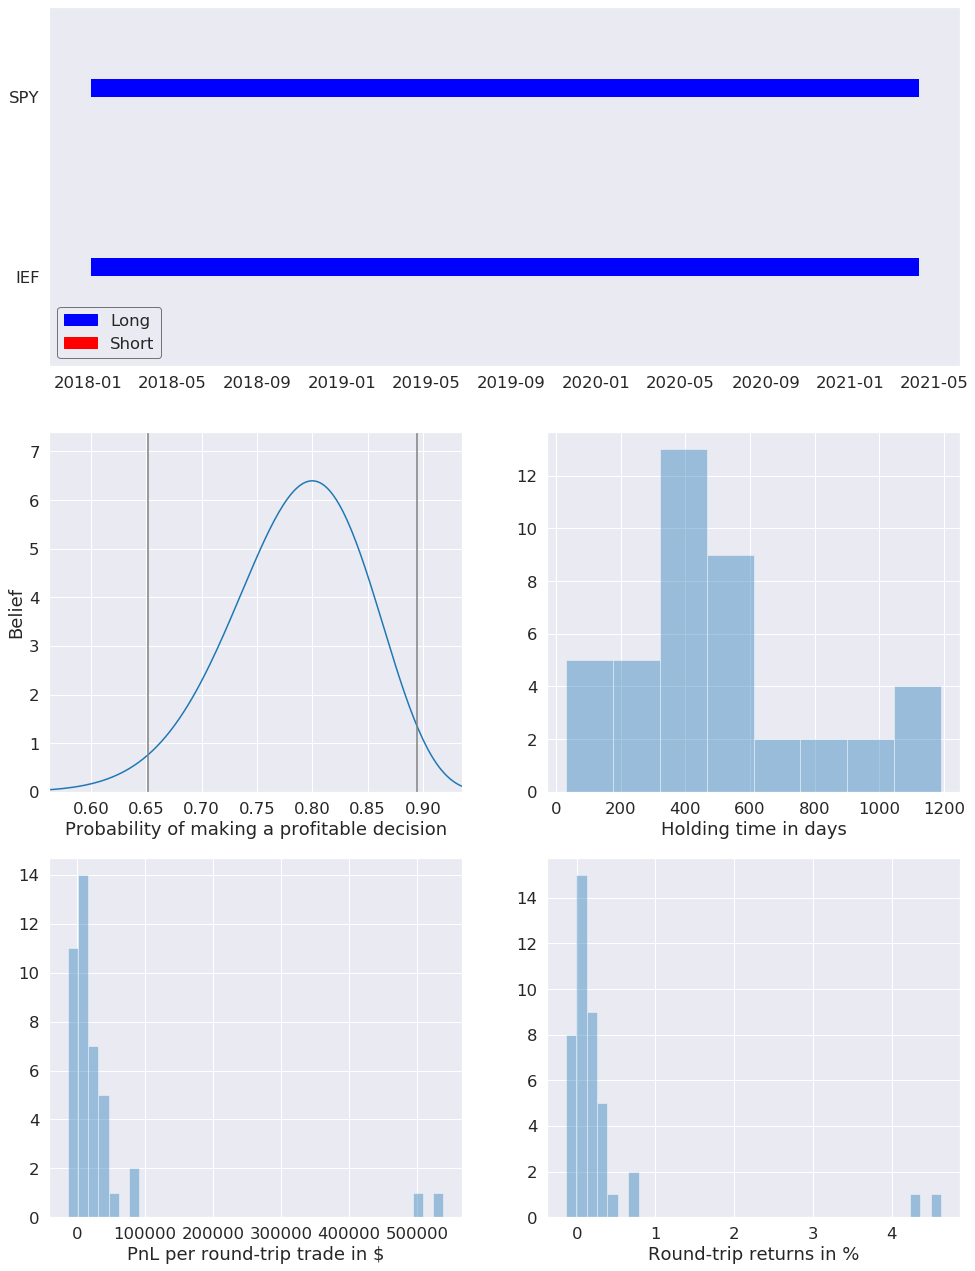

In [17]:
#%%pixie_debugger

from zipline.data import benchmarks
# Set up benchmark Asset 
spy_bm_ret    = benchmarks.get_benchmark_returns(symbol='SPY', first_date=sim_start, last_date=sim_end)
spy_bm_ret    = spy_bm_ret[sim_start:sim_end]
spy_bm_ret[0] = 0.0 # Normalize benchmark returns to start at 0.0.
perf          = perf[sim_start:sim_end]

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, bootstrap=None,benchmark_rets=spy_bm_ret, round_trips=True)
#pf.create_simple_tear_sheet(returns=returns,positions=positions,transactions=transactions)